In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/work/jprieto/data/remote/EGower/jprieto/trachoma_normals_healthy_sev123_05182021_stack_32_384_test_prediction.csv')

csv_true_column = 'class'
csv_prediction_column = 'prediction'

df[csv_true_column] = (df[csv_true_column] >= 1).astype(int)
df[csv_prediction_column] = df[csv_prediction_column].astype(int)


print(df)

                                                   img  \
0    /work/jprieto/data/remote/EGower/jprieto/trach...   
1    /work/jprieto/data/remote/EGower/jprieto/trach...   
2    /work/jprieto/data/remote/EGower/jprieto/trach...   
3    /work/jprieto/data/remote/EGower/jprieto/trach...   
4    /work/jprieto/data/remote/EGower/jprieto/trach...   
..                                                 ...   
398  /work/jprieto/data/remote/EGower/jprieto/trach...   
399  /work/jprieto/data/remote/EGower/jprieto/trach...   
400  /work/jprieto/data/remote/EGower/jprieto/trach...   
401  /work/jprieto/data/remote/EGower/jprieto/trach...   
402  /work/jprieto/data/remote/EGower/jprieto/trach...   

                                                  orig  class  severity_class  \
0    /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               3   
1    /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               3   
2    /work/jprieto/data/remote/EGower/jprieto/eyes_...      

In [5]:
y_true_arr = [] 
y_pred_arr = []
for idx, row in df.iterrows():
  y_true_arr.append(row[csv_true_column])
  y_pred_arr.append(row[csv_prediction_column])

In [6]:
cnf_matrix = confusion_matrix(y_true_arr, y_pred_arr)
print(cnf_matrix)

[[ 90  19]
 [ 20 274]]


In [7]:
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print(cnf_matrix_norm)

[[0.82568807 0.17431193]
 [0.06802721 0.93197279]]


<AxesSubplot:>

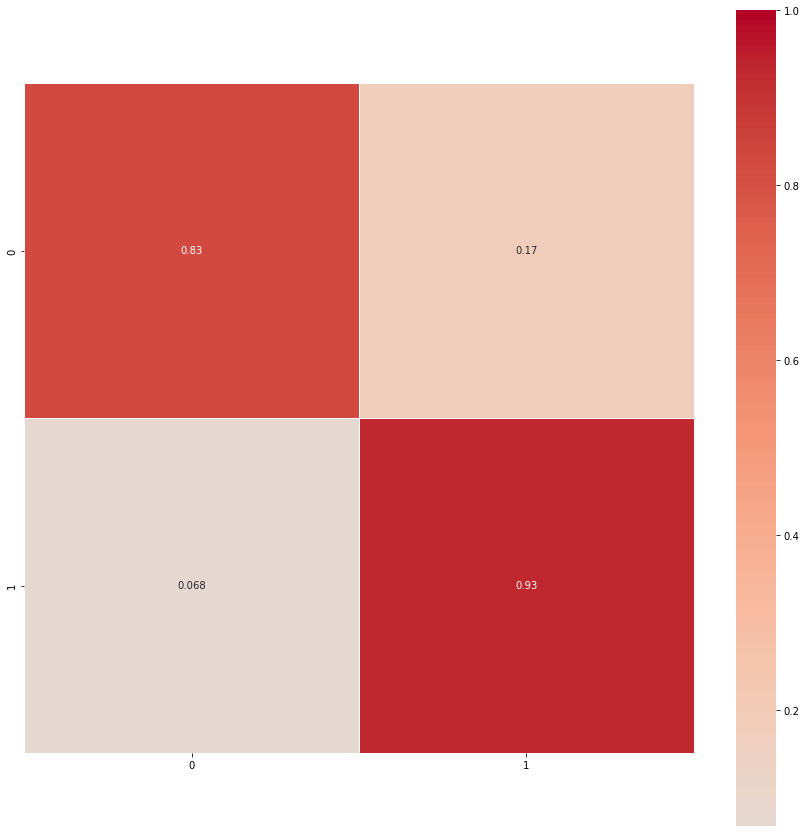

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(cnf_matrix_norm, cmap=cmap, annot=True, vmax=1.0, center=0, square=True, linewidths=.5)

In [9]:
print(classification_report(y_true_arr, y_pred_arr))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.94      0.93      0.93       294

    accuracy                           0.90       403
   macro avg       0.88      0.88      0.88       403
weighted avg       0.90      0.90      0.90       403

